<span style="color:orange">

# Superconductivty Dataset- Prediction of Critical Temperature

# Dataset Information

## Additional Information

This dataset consists of two files:

1. **train.csv**: Contains 81 features extracted from 21,263 superconductors. The 82nd column in this file represents the critical temperature for each superconductor.
   
2. **unique_m.csv**: Contains the chemical formula broken down for all 21,263 superconductors from the `train.csv` file. The last two columns in this file include the critical temperature and the chemical formula.

The data can be accessed from[UCI Machine Learning Repository on Superconducting Data](https://archive.ics.uci.edu/dataset/464/superconductivty+data), which is a public resource.

**The objective of using this dataset is to predict the critical temperature of superconductors based on the extracted features provided in `train.csv`.**



## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 

import os
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Customisation of graph

In [2]:
# For customisation of graph
sns.set_style('darkgrid')

## 1. Data Preparation

In [3]:
od.download('https://www.kaggle.com/datasets/tunguz/superconductivty-data-data-set?select=train.csv')

Skipping, found downloaded files in ".\superconductivty-data-data-set" (use force=True to force download)


In [4]:
os.listdir('superconductivty-data-data-set')

['train.csv', 'unique_m.csv']

## 2. Import Dataset & Basic operations

In [5]:
df = pd.read_csv('superconductivty-data-data-set/train.csv')
df

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787              36.396602             1.449309   
2              66.361592              36.122509             1.181795   
3              66.361592              36.119560             1.181795   
4              66.361592              36.110716             1.181795   
...                  ...                    ...                  ...   
21258          82.515384              43.135565             1.177145   
21259          64.812662              32.867748             1.323287   
21260          99.433882              95.464320             0.690847   
21261          99.433882              96.901083             0.690847   
21262          82.555758              80.458722             1.041270   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                     1.062396          122.90607              31.794921   
1                     1.057755          122.90607              36.161939   
2                     0.975980          122.90607              35.741099   
3                     1.022291          122.90607              33.768010   
4                     1.129224          122.90607              27.848743   
...                        ...                ...                    ...   
21258                 1.254119          146.88130              15.504479   
21259                 1.571630          188.38390               7.353333   
21260                 0.530198           13.51362              53.041104   
21261                 0.640883           13.51362              31.115202   
21262                 0.895229           71.75500              43.144000   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
0            51.968828  ...          2.257143       2.213364   
1            47.094633  ...          2.257143       1.888175   
2            51.968828  ...          2.271429       2.213364   
3            51.968828  ...          2.264286       2.213364   
4            51.968828  ...          2.242857       2.213364   
...                ...  ...               ...            ...   
21258        65.764081  ...          3.555556       3.223710   
21259        69.232655  ...          2.047619       2.168944   
21260         6.756810  ...          4.800000       4.472136   
21261         6.756810  ...          4.690000       4.472136   
21262        29.905282  ...          4.500000       4.762203   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
0               2.219783         1.368922             1.066221              1   
1               2.210679         1.557113             1.047221              2   
2               2.232679         1.368922             1.029175              1   
3               2.226222         1.368922             1.048834              1   
4               2.206963         1.368922             1.096052              1   
...                  ...              ...                  ...            ...   
21258           3.519911         1.377820             0.913658  

In [6]:
df.shape

(21263, 82)

In [7]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [9]:
df.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21263.000000  ...      21263.000000   21263.000000   
mean         44.391893  ...          3.153127       3.056536   
std          20.035430  ...          1.191249       1.046257   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116732       2.279705   
50%          45.123500  ...          2.618182       2.615321   
75%          59.322812  ...          4.026201       3.727919   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21263.000000     21263.000000         21263.000000   21263.000000   
mean            3.055885         1.295682             1.052841       2.041010   
std             1.174815         0.393155             0.380291       1.242345   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.091251         1.060857             0.775678       1.000000   
50%             2.434057         1.368922             1.166532       2.000000   
75%             3.914868         1.589027             1.330801       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21263.000000  21263.000000     21263.000000   21263.000000  
mean            1.483007      0.839342         0.673987      34.421219  
std             0.978176      0.484676         0.455580      34.254362  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921454      0.451754         0.306892       5.365000  
50%             1.063077      0.800000         0.500000      20.000000  
75%             1.918400      1.200000         1.020436      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

In [10]:
# Check for missing values
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [11]:
df.nunique()

number_of_elements           9
mean_atomic_mass          3365
wtd_mean_atomic_mass     15164
gmean_atomic_mass         3365
wtd_gmean_atomic_mass    15165
                         ...  
range_Valence                7
wtd_range_Valence         5908
std_Valence                125
wtd_std_Valence           7082
critical_temp             3007
Length: 82, dtype: int64

## 3. Finding Relevant Features

In [12]:
relevant_features = abs(df.corr()['critical_temp'])[abs(df.corr()['critical_temp']) > 0.5]

In [13]:
# Selecting specific features from the DataFrame
features=['number_of_elements','wtd_entropy_atomic_mass','entropy_fie','range_fie',
          'wtd_std_fie','wtd_entropy_atomic_radius','range_atomic_radius','wtd_std_atomic_radius',
          'gmean_Density','wtd_entropy_FusionHeat','wtd_std_ThermalConductivity','wtd_mean_Valence',
          'entropy_Valence','critical_temp']

# Creating a new DataFrame with only the selected features
df_new = df[features]

# Displaying the first 10 rows of the new DataFrame
df_new.head(10)


number_of_elements  wtd_entropy_atomic_mass  entropy_fie  range_fie  \
0                   4                 1.062396     1.305967      810.6   
1                   5                 1.057755     1.544145      810.6   
2                   4                 0.975980     1.305967      810.6   
3                   4                 1.022291     1.305967      810.6   
4                   4                 1.129224     1.305967      810.6   
5                   4                 1.225203     1.305967      810.6   
6                   4                 1.316857     1.305967      810.6   
7                   4                 0.943560     1.313008      772.0   
8                   4                 0.981880     1.313008      772.0   
9                   4                 1.016495     1.313008      772.0   

   wtd_std_fie  wtd_entropy_atomic_radius  range_atomic_radius  \
0   355.562967                   1.207040                  205   
1   354.963511                   1.204115                  205   
2   354.804183                   1.132547                  205   
3   355.183884                   1.173033                  205   
4   356.319281                   1.261194                  205   
5   357.824566                   1.331339                  205   
6   361.545642                   1.367279                  205   
7   353.894217                   1.121818                  171   
8   353.819831                   1.160060                  171   
9   353.745421                   1.192734                  171   

   wtd_std_atomic_radius  gmean_Density  wtd_entropy_FusionHeat  \
0              69.235569     724.953211                0.994998   
1              68.008817    1237.095080                1.073094   
2              67.797712     724.953211                0.927479   
3              68.521665     724.953211                0.964031   
4              70.634448     724.953211                1.044970   
5              73.324134     724.953211                1.111850   
6              79.500995     724.953211                1.156821   
7              66.848571     674.484751                0.927479   
8              67.111458     674.484751                0.964031   
9              67.372883     674.484751                0.994998   

   wtd_std_ThermalConductivity  wtd_mean_Valence  entropy_Valence  \
0                   138.517163          2.257143         1.368922   
1                   139.630922          2.257143         1.557113   
2                   138.540613          2.271429         1.368922   
3                   138.528893          2.264286         1.368922   
4                   138.493671          2.242857         1.368922   
5                   138.446567          2.214286         1.368922   
6                   138.328090          2.142857         1.368922   
7                   138.480008          2.271429         1.368922   
8                   138.437714          2.264286         1.368922   
9                   138.395229          2.257143         1.368922   

   critical_temp  
0           29.0  
1           26.0  
2           19.0  
3           22.0  
4           23.0  
5           23.0  
6           11.0  
7           33.0  
8           36.0  
9           31.0

In [14]:
# Correlation between each columns
df_new.corr()

number_of_elements  wtd_entropy_atomic_mass  \
number_of_elements                     1.000000                 0.881845   
wtd_entropy_atomic_mass                0.881845                 1.000000   
entropy_fie                            0.973195                 0.891982   
range_fie                              0.781227                 0.744625   
wtd_std_fie                            0.717831                 0.731250   
wtd_entropy_atomic_radius              0.904121                 0.961464   
range_atomic_radius                    0.768060                 0.774054   
wtd_std_atomic_radius                  0.695089                 0.737633   
gmean_Density                         -0.630504                -0.596833   
wtd_entropy_FusionHeat                 0.860479                 0.873931   
wtd_std_ThermalConductivity            0.665580                 0.684497   
wtd_mean_Valence                      -0.648551                -0.644336   
entropy_Valence                        0.967832                 0.897636   
critical_temp                          0.601069                 0.626930   

                             entropy_fie  range_fie  wtd_std_fie  \
number_of_elements              0.973195   0.781227     0.717831   
wtd_entropy_atomic_mass         0.891982   0.744625     0.731250   
entropy_fie                     1.000000   0.767796     0.708893   
range_fie                       0.767796   1.000000     0.940281   
wtd_std_fie                     0.708893   0.940281     1.000000   
wtd_entropy_atomic_radius       0.920192   0.797663     0.781457   
range_atomic_radius             0.773937   0.908734     0.887192   
wtd_std_atomic_radius           0.710635   0.871711     0.922258   
gmean_Density                  -0.624222  -0.815491    -0.795222   
wtd_entropy_FusionHeat          0.864214   0.657066     0.653455   
wtd_std_ThermalConductivity     0.650649   0.670738     0.709665   
wtd_mean_Valence               -0.624606  -0.731329    -0.754516   
entropy_Valence                 0.992726   0.782544     0.736856   
critical_temp                   0.567817   0.600790     0.582013   

                             wtd_entropy_atomic_radius  range_atomic_radius  \
number_of_elements                            0.904121             0.768060   
wtd_entropy_atomic_mass                       0.961464             0.774054   
entropy_fie                                   0.920192             0.773937   
range_fie                                     0.797663             0.908734   
wtd_std_fie                                   0.781457             0.887192   
wtd_entropy_atomic_radius                     1.000000             0.812398   
range_atomic_radius                           0.812398             1.000000   
wtd_std_atomic_radius                         0.781488             0.958004   
gmean_Density                                -0.654177            -0.815835   
wtd_entropy_FusionHeat                        0.907860             0.666575   
wtd_std_ThermalConductivity                   0.675969             0.736142   
wtd_mean_Valence                             -0.660216            -0.756621   
entropy_Valence                               0.919184             0.796085   
critical_temp                                 0.603494             0.653759   

                             wtd_std_atomic_radius  gmean_Density  \
number_of_elements                        0.695089      -0.630504   
wtd_entropy_atomic_mass                   0.737633      -0.596833   
entropy_fie                               0.710635      -0.624222   
range_fie                                 0.871711      -0.815491   
wtd_std_fie                               0.922258      -0.795222   
wtd_entropy_atomic_radius                 0.781488      -0.654177   
range_atomic_radius                       0.958004      -0.815835   
wtd_std_atomic_radius                     1.000000      -0.798778   
gmean_Density                            -0.798778       1.0

## 4. Visual Data Analysis

<Axes: >

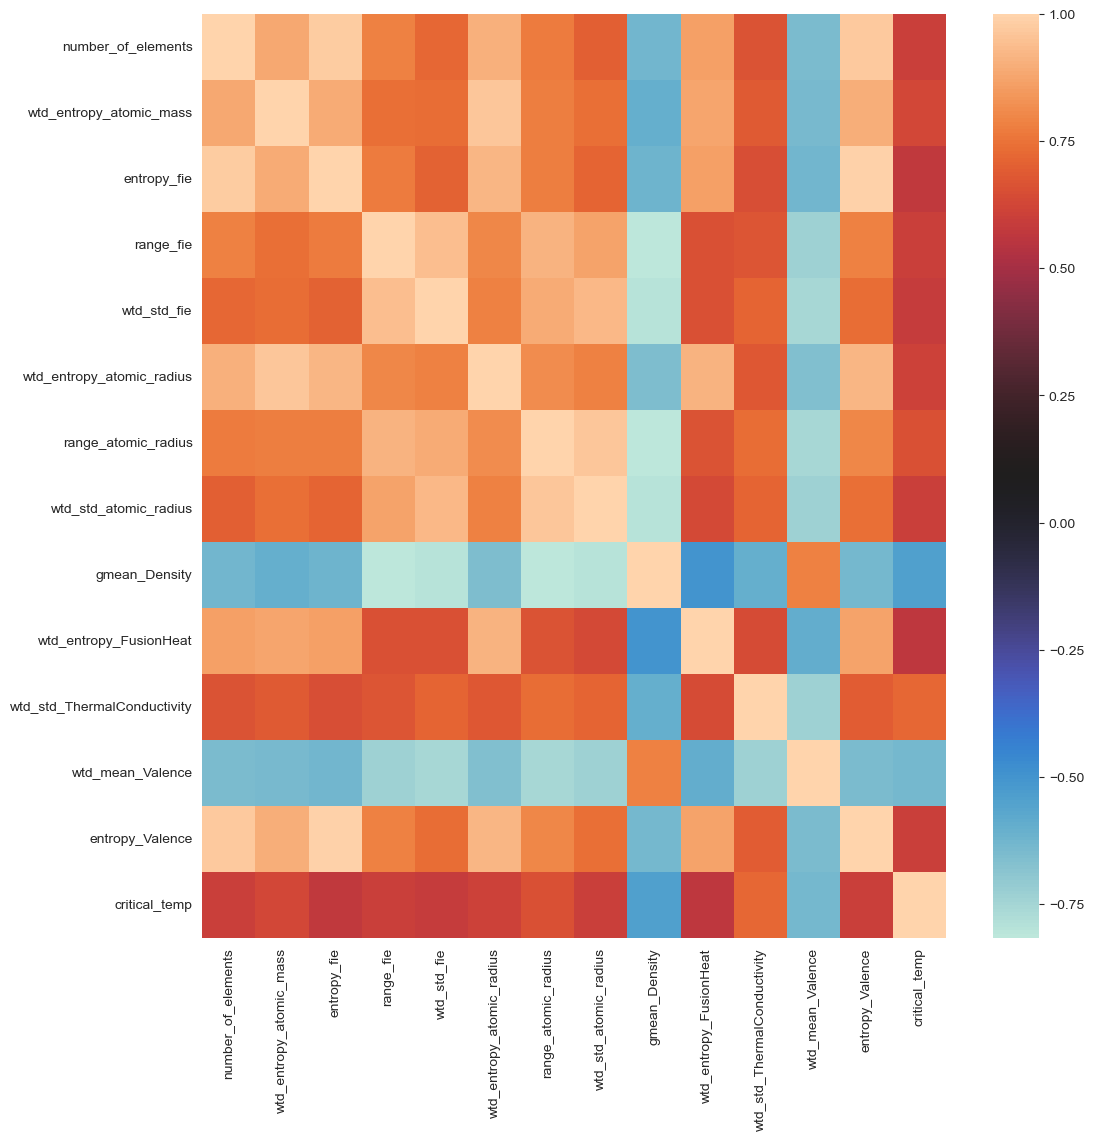

In [15]:
plt.figure(figsize=(12, 12))

# Calculate correlation matrix
corr = df_new.corr()

# Plot heatmap of the correlation matrix
sns.heatmap(corr, cmap='icefire')

D:\msdownld.tmp\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


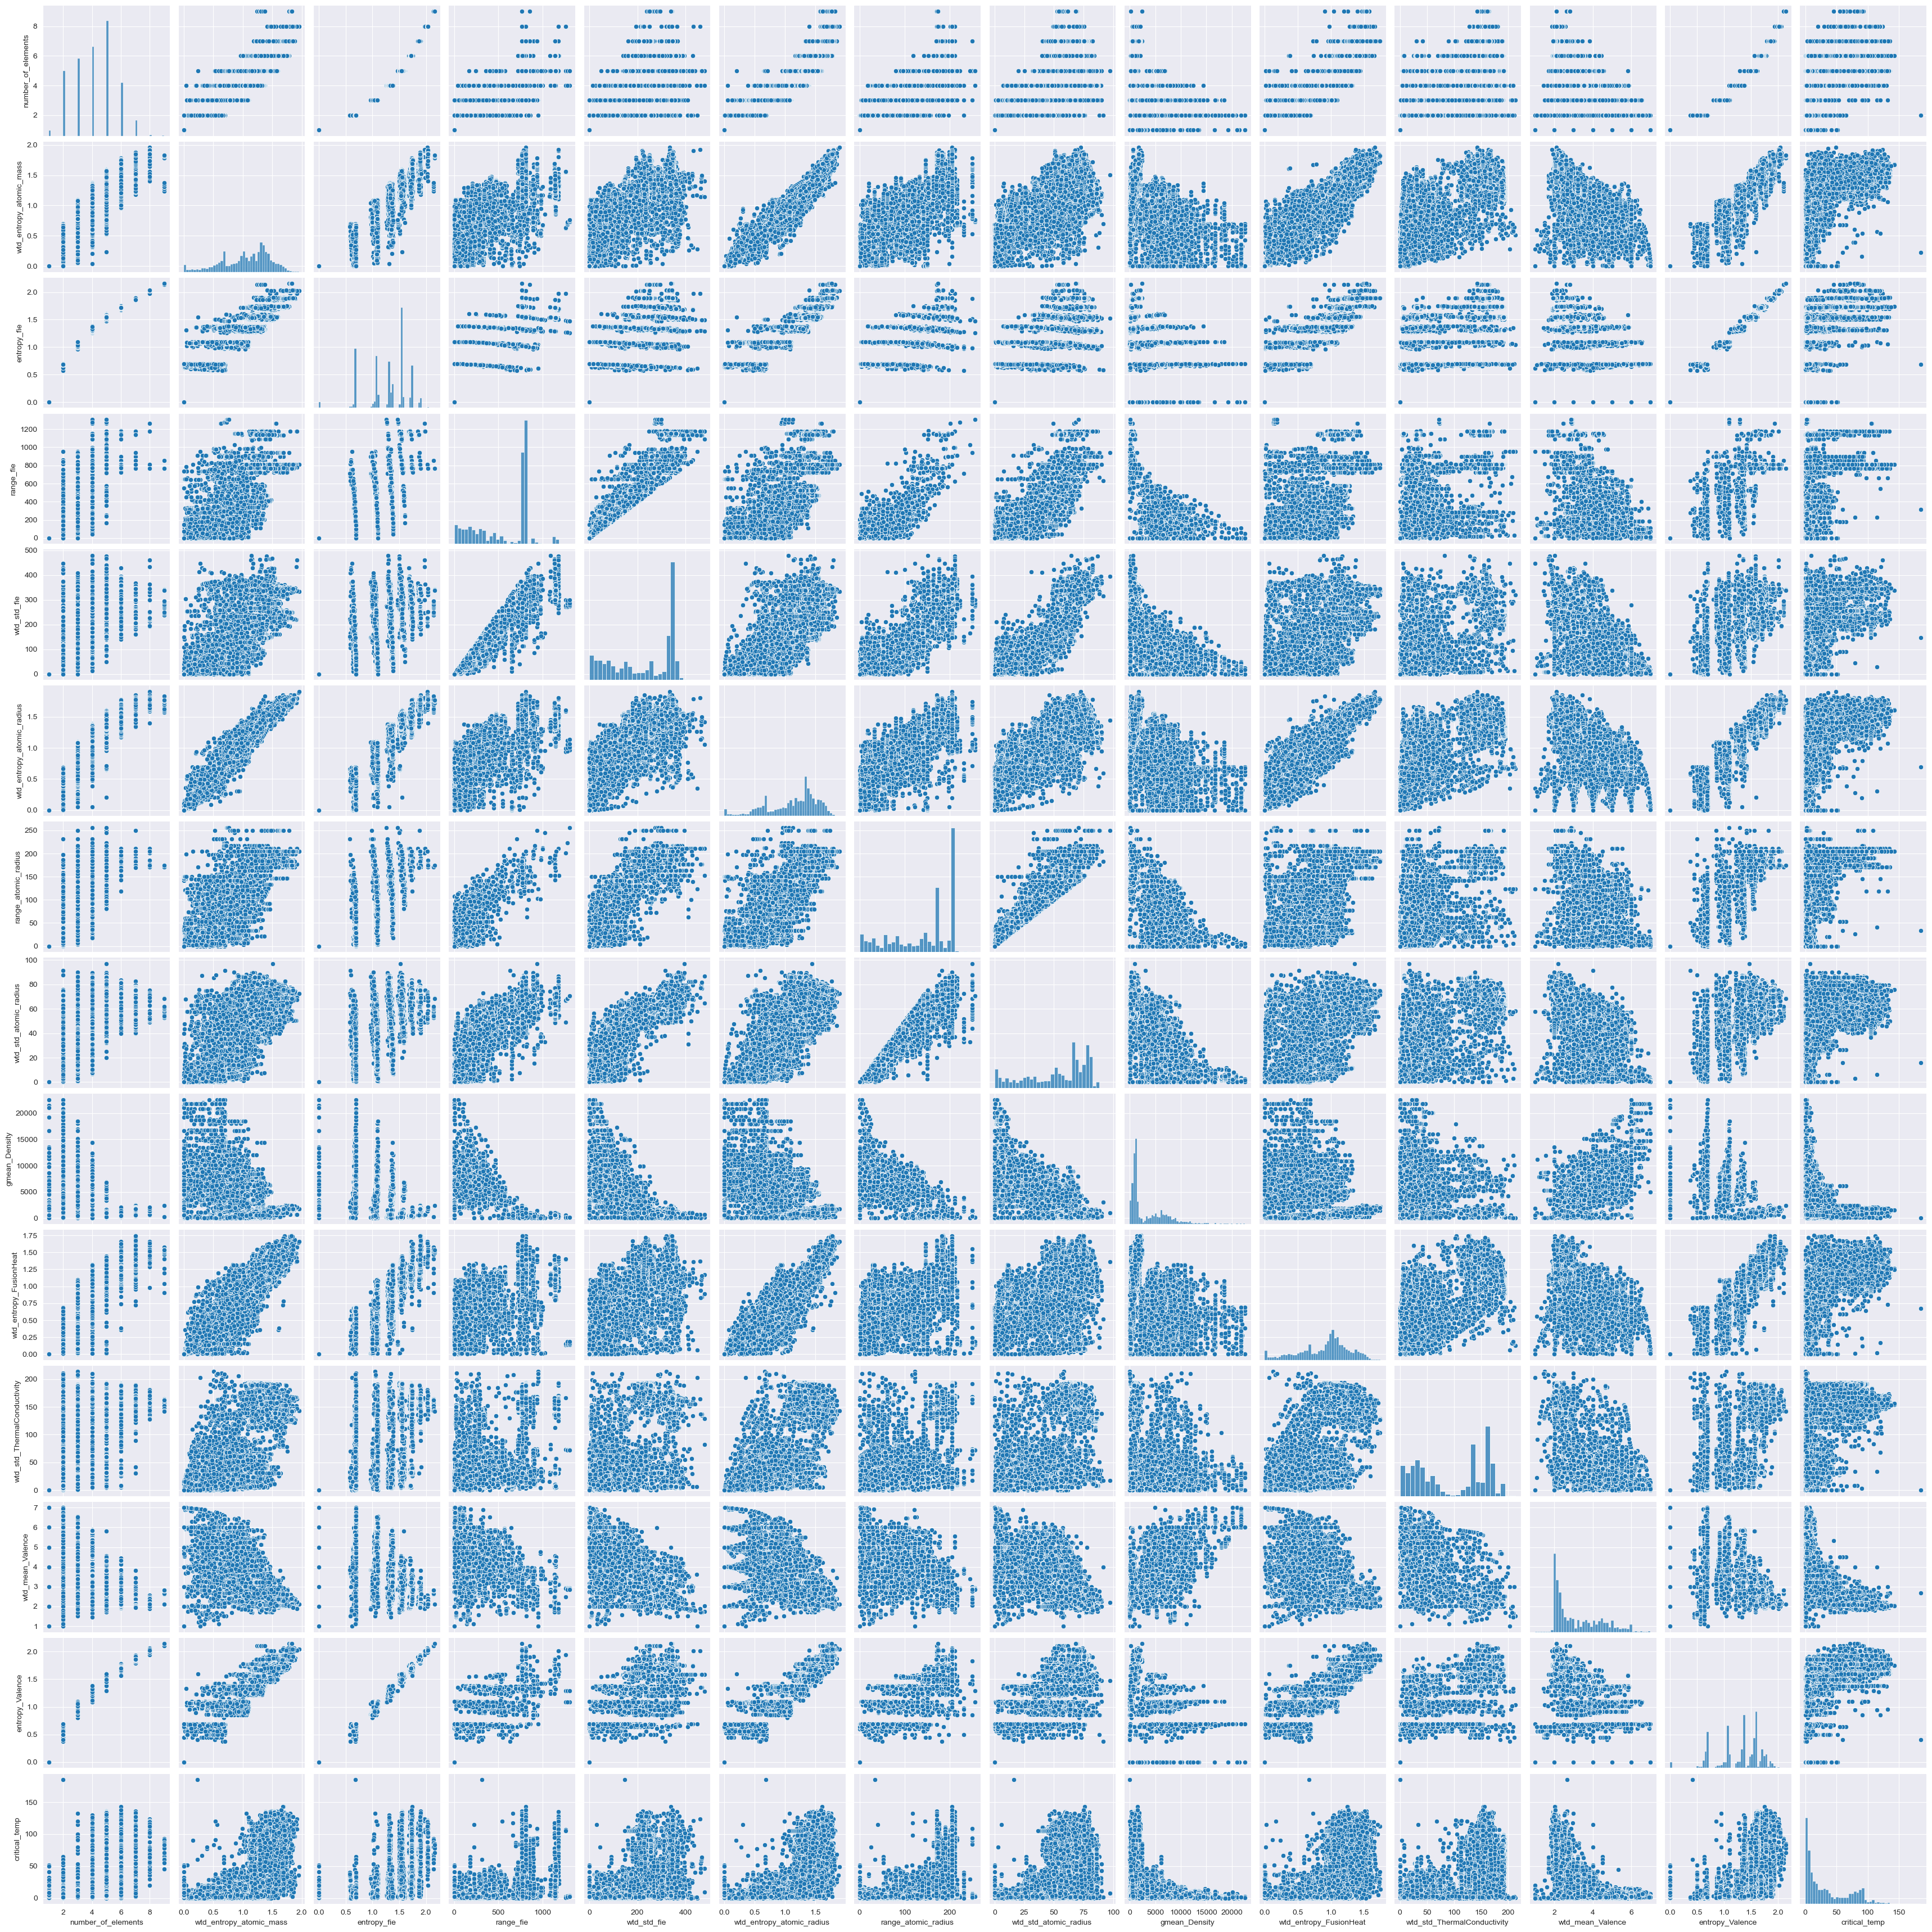

In [16]:
# Create Pairplot
sns.pairplot(df_new)

## 5. Model Training (Splitting of data to train and test)

In [17]:
# Column 'critical_temp' is the target variable
X = df_new.drop(['critical_temp'], axis=1)
y = df_new['critical_temp']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.1 Linear Regression

In [18]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model on training data
LR.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Calculate R^2 score and store in error_df
error_df = []
error_df.append(pd.Series({
    'Train R^2 score :': r2_score(y_train, y_train_pred),
    'Test R^2 score :': r2_score(y_test, y_test_pred)
}, name='no enc'))

# Retrieve R^2 score for test set
LR_r2 = r2_score(y_test, y_test_pred)

# Display error_df
error_df


[Train R^2 score :    0.601854
 Test R^2 score :     0.613237
 Name: no enc, dtype: float64]

### 5.2 Linear Regression with Scaling

In [19]:
# Define scalers to be used
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'maxabs': MaxAbsScaler()
}

# Function to train, predict, and evaluate Linear Regression model with different scalers
def evaluate_regression_with_scaler(scaler, X_train, X_test, y_train, y_test):
    # Create copies of training and testing sets
    trainingset = X_train.copy()
    testset = X_test.copy()
    
    # Identify columns with float data type
    mask = X_train.dtypes == float  # Use 'float' instead of np.float
    float_columns = X_train.columns[mask]
    
    # Scale the float columns using the provided scaler
    trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
    testset[float_columns] = scaler.transform(testset[float_columns])
    
    # Initialize Linear Regression model
    LR = LinearRegression()
    
    # Fit the model on scaled training set
    LR.fit(trainingset, y_train)
    
    # Make predictions on scaled testing set
    predictions = LR.predict(testset)
    
    # Calculate R^2 score
    r2 = r2_score(y_test, predictions)
    
    return r2, LR.coef_

# Evaluate each scaler and print results
for scaler_label, scaler in scalers.items():
    r2_score_value, coefficients = evaluate_regression_with_scaler(scaler, X_train, X_test, y_train, y_test)
    print(f'{scaler_label} scaling R^2 score: {r2_score_value}')

standard scaling R^2 score: 0.6132368919769762
minmax scaling R^2 score: 0.6132368919769764
maxabs scaling R^2 score: 0.6132368919769762


### 5.3 Polynomial Regression

In [20]:
# Define PolynomialFeatures and specify degree
poly = PolynomialFeatures(degree=2)

# Transforming features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
clf = LinearRegression()

# Fit the model on polynomial features
clf.fit(X_train_poly, y_train)

# Predict on polynomial features
y_pred = clf.predict(X_test_poly)

# Calculate R^2 score for polynomial regression
polynomial_r2 = r2_score(y_test, y_pred)

print(f"Polynomial R^2 score: {polynomial_r2}")


Polynomial R^2 score: 0.7187853753343042


### 5.4 Ridge Regression

In [21]:
# Define a list of alpha values to test
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Initialize RidgeCV model with specified alphas and cross-validation folds
ridgeCV = RidgeCV(alphas=alphas, cv=4)

# Fit the RidgeCV model on training data
ridgeCV.fit(X_train, y_train)

# Predict on testing data
y_pred = ridgeCV.predict(X_test)

# Calculate R^2 score for Ridge Regression
ridgeCV_r2 = r2_score(y_test, y_pred)

# Print best alpha and corresponding R^2 score
print(f"Best alpha: {ridgeCV.alpha_}")
print(f"R^2 score with best alpha: {ridgeCV_r2}")


Best alpha: 0.1
R^2 score with best alpha: 0.6132155049857488


### 5.5 Lasso Regression

In [22]:
# Define a list of alpha values to test
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])

# Initialize LassoCV model with specified alphas, maximum iterations, and cross-validation folds
lassoCV = LassoCV(alphas=alphas2, max_iter=50000, cv=3)

# Fit the LassoCV model on training data
lassoCV.fit(X_train, y_train)

# Predict on testing data
y_pred = lassoCV.predict(X_test)

# Calculate R^2 score for Lasso Regression
lassoCV_r2 = r2_score(y_test, y_pred)

# Print best alpha and corresponding R^2 score
print(f"Best alpha: {lassoCV.alpha_}")
print(f"R^2 score with best alpha: {lassoCV_r2}")


Best alpha: 0.0001
R^2 score with best alpha: 0.613230754147748


### 5.6 ElasticNet

In [23]:
# Define a list of alpha values to test
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])

# Define a list of l1_ratios
l1_ratios = np.linspace(0.1, 0.9, 9)

# Initialize ElasticNetCV model with specified alphas, l1_ratios, maximum iterations, and cross-validation folds
elasticNetCV = ElasticNetCV(alphas=alphas2, l1_ratio=l1_ratios, max_iter=10000)

# Fit the ElasticNetCV model on training data
elasticNetCV.fit(X_train, y_train)

# Predict on testing data
y_pred = elasticNetCV.predict(X_test)

# Calculate R^2 score for ElasticNet Regression
elasticNetCV_r2 = r2_score(y_test, y_pred)

# Print best alpha, best l1_ratio, and corresponding R^2 score
print(f"Best alpha: {elasticNetCV.alpha_}")
print(f"Best l1_ratio: {elasticNetCV.l1_ratio_}")
print(f"R^2 score with best alpha and l1_ratio: {elasticNetCV_r2}")


Best alpha: 1e-05
Best l1_ratio: 0.5
R^2 score with best alpha and l1_ratio: 0.6132184325014574


### 5.7 Comparision of Different Regression Model

In [24]:
# Create a list of R2 scores and corresponding labels
rmse_vals = [LR_r2, polynomial_r2, ridgeCV_r2, lassoCV_r2, elasticNetCV_r2]
labels = ['Linear', 'Polynomial', 'Ridge', 'Lasso', 'ElasticNet']

# Create a DataFrame to display the R2 scores
rmse_df = pd.DataFrame(rmse_vals, index=labels, columns=['R2 Score'])

# Display the DataFrame
print(rmse_df)

            R2 Score
Linear      0.613237
Polynomial  0.718785
Ridge       0.613216
Lasso       0.613231
ElasticNet  0.613218


### 5.8 Decision Tree Regressor

In [28]:
# Define the parameters to test
max_depths = [30, 50, 70, 90]
min_samples_leafs = [2, 5, 10]

# Initialize an empty list to store results
test_results = []

# Iterate over each combination of max_depth and min_samples_leaf
for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs: 
        # Initialize Decision Tree Regressor with current parameters
        dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        
        # Fit the model on training data
        dt.fit(X_train, y_train)
        
        # Predict on testing data
        y_pred = dt.predict(X_test)
        
        # Calculate R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Append results to the list
        test_results.append({'Max Depth': max_depth, 'Min Samples Leaf': min_samples_leaf, 'R2 Score': r2})
        
# Create a DataFrame from the results list
results_df = pd.DataFrame(test_results)

# Display the DataFrame
print(results_df)


    Max Depth  Min Samples Leaf  R2 Score
0          30                 2  0.864918
1          30                 5  0.870755
2          30                10  0.867678
3          50                 2  0.870060
4          50                 5  0.870755
5          50                10  0.867678
6          70                 2  0.870060
7          70                 5  0.870755
8          70                10  0.867678
9          90                 2  0.870060
10         90                 5  0.870755
11         90                10  0.867678


### 5.9 Random Forest Regressor

In [29]:
# Initialize RandomForestRegressor with a fixed random state for reproducibility
rfr = RandomForestRegressor(random_state=42)

# Train the RandomForestRegressor model on the training data
rfr.fit(X_train, y_train)

# Predict target variable on the test data
y_pred = rfr.predict(X_test)

# Evaluate model performance using R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the R2 score to assess model performance
print(f"Random Forest (R^2) Score: {r2}")


Random Forest (R^2) Score: 0.9138938777535401


### 5.10 Hyperparameter Tuning for Random Forest

In [66]:
# Define lists of hyperparameters to test
n_estimators = [100, 200, 500]
max_depths = [30, 50, 70]
min_samples_leafs = [2, 5, 10]

# Initialize an empty list to store results
test_results = []

# Iterate over each combination of hyperparameters
for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            # Initialize RandomForestRegressor with current hyperparameters
            rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_jobs=-1, random_state=42)
            
            # Fit the model on training data
            rf.fit(X_train, y_train)
            
            # Predict on testing data
            y_pred = rf.predict(X_test)
            
            # Calculate R2 score
            r2 = r2_score(y_test, y_pred)
            
            # Append results to the list
            test_results.append({'Number of Estimators': estimator, 'Max Depth': max_depth, 'Min Samples Leaf': min_samples_leaf, 'R2 Score': r2})
            
            # Print the current results
            print(f"Number of Estimators: {estimator}, Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}, R2 Score: {r2}")


Number of Estimators: 100, Max Depth: 30, Min Samples Leaf: 2, R2 Score: 0.9133467430799395
Number of Estimators: 100, Max Depth: 30, Min Samples Leaf: 5, R2 Score: 0.9077570920106754
Number of Estimators: 100, Max Depth: 30, Min Samples Leaf: 10, R2 Score: 0.8972674729537587
Number of Estimators: 100, Max Depth: 50, Min Samples Leaf: 2, R2 Score: 0.9133389730475028
Number of Estimators: 100, Max Depth: 50, Min Samples Leaf: 5, R2 Score: 0.9077513649300177
Number of Estimators: 100, Max Depth: 50, Min Samples Leaf: 10, R2 Score: 0.8972674729537587
Number of Estimators: 100, Max Depth: 70, Min Samples Leaf: 2, R2 Score: 0.9133389730475028
Number of Estimators: 100, Max Depth: 70, Min Samples Leaf: 5, R2 Score: 0.9077513649300177
Number of Estimators: 100, Max Depth: 70, Min Samples Leaf: 10, R2 Score: 0.8972674729537587
Number of Estimators: 200, Max Depth: 30, Min Samples Leaf: 2, R2 Score: 0.9140084652679283
Number of Estimators: 200, Max Depth: 30, Min Samples Leaf: 5, R2 Score: 0.90

In [27]:
# Define lists of hyperparameters to test
n_estimators = [200, 300, 400, 500, 600, 700]
max_depths = [30, 50, 70, 90]

# Initialize an empty list to store results
test_results = []

# Iterate over each combination of hyperparameters
for estimator in n_estimators:
    for max_depth in max_depths:
        # Initialize RandomForestRegressor with current hyperparameters
        rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=2, n_jobs=-1, random_state=42)
        
        # Fit the model on training data
        rf.fit(X_train, y_train)
        
        # Predict on testing data
        y_pred = rf.predict(X_test)
        
        # Calculate R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Append results to the list
        test_results.append({'Number of Estimators': estimator, 'Max Depth': max_depth, 'Min Samples Leaf': 2, 'R2 Score': r2})
    
# Optional: Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(test_results)
print(results_df)

    Number of Estimators  Max Depth  Min Samples Leaf  R2 Score
0                    200         30                 2  0.914008
1                    200         50                 2  0.914003
2                    200         70                 2  0.914003
3                    200         90                 2  0.914003
4                    300         30                 2  0.914362
5                    300         50                 2  0.914339
6                    300         70                 2  0.914339
7                    300         90                 2  0.914339
8                    400         30                 2  0.914604
9                    400         50                 2  0.914581
10                   400         70                 2  0.914581
11                   400         90                 2  0.914581
12                   500         30                 2  0.914779
13                   500         50                 2  0.914728
14                   500         70     

## 6. Final Model

In [26]:
rf = RandomForestRegressor(n_estimators=400, random_state=42)

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate model performance using R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the R2 score to assess model performance
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.9151290387160638


### 5.1 Conclusion 

- **Regression Methods:**
  - Linear Regression
  - Linear Regression with Scaling
  - Polynomial Regression
  - Ridge Regression
  - Lasso Regression
  - ElasticNet
  
- **Other Regression Techniques:**
  - Decision Tree Regressor
  
- **Ensemble Method:**
  - Random Forest Regressor
  
### Best R2 Scores Achieved

- **Polynomial Regression:**
  - R2-score:0.719
  
- **Decision Tree Regressor:**
  - R2-score: 0.871
  - Best parameters:
    - Max Depth: 50
    - Min Samples Leaf: 5

- **Random Forest Regressor:**
  - R2-score: 0.915
  - Best parameters:
    - Number of Estimators: 400  